## Multivariate Linear Regression

Regression means relation and here we are analyzing relation between two or more variables. Basically these variables are dependent and Independent of each other. In multivariate LR we have more than one features to work with. That's how it is different from Univariate linear regression. 

We will build this model with Two Methods one is using "SkLearn" and other one is from scratch "using only numpy". 

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Churn_Modelling.csv")

In [5]:
data.shape

(10000, 14)

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


## Splitting Data into Features and Labels

In [19]:
features = data.iloc[:, 3:13].values
label = data.iloc[:, 13].values

In [20]:
features[1]

array([608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

## Pre-Processing Data
In data preprocessing we basically clean our data for the models. So the model can train better and extract features and patterns from the dataset. We basically bring all the values in between 0 to 1 as it is easier to process.

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_features_1 = LabelEncoder()
features[:, 1] = labelencoder_features_1.fit_transform(features[:, 1])

labelencoder_features_2 = LabelEncoder()
features[:, 2] = labelencoder_features_2.fit_transform(features[:, 2])

onehotencoder = OneHotEncoder(categorical_features = [1])
features = onehotencoder.fit_transform(features).toarray()

features = features[:, 1:] #dummy variable trap

In [22]:
features[1]

array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

## Splitting Dataset into training data and testing dataset

We are using sklearn to split our data into training and test dataset

In [23]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [41]:
## Feature Scaling the training sets and test sets
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [25]:
from sklearn.linear_model import LinearRegression 
regressor= LinearRegression()
regressor.fit(features_train, labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#Predicting the Test set results 
Pred= regressor.predict(features_test)
print(Pred)

[0.26241452 0.33639512 0.18921297 ... 0.22140128 0.17337934 0.26843589]


In [27]:
#Getting score for the Multi Linear Regression Model
Score= regressor.score(features_train, labels_train)
print(Score*100)

15.014657823317634


## Building Model Using Only Numpy

In [28]:
features = features/features.max()
label = label/label.max()

In [29]:
features = np.array(features)
label = np.array(label)

In [30]:
label = np.array(label)
label = np.reshape(label,[1,len(label)])
print(label.shape)

(1, 10000)


In [31]:
features.shape

(10000, 11)

In [32]:
label.shape

(1, 10000)

In [33]:
# Line Function
def line_multidim(m,x,c):
    return np.dot(m,x.T) + c

# Error Function
def error(m,x,c,y):
    return np.mean((line_multidim(m,x,c) - y)**2)

# Slope
def derivative_slopes(m,x,c,y):
    return 2*np.mean(np.multiply((line_multidim(m,x,c)-y),x.T),axis = 1)

# Derivative Intercept
def derivative_intercept(m,x,c,y):
    return 2*np.mean((line_multidim(m,x,c)-y))

# to calculate accuracy
def accuracy_pred(error,y):
    return 100 - (error/np.mean(y**2))*100

Current Error:  0.3039843150916399 Current Iteration: 0
Current Accuracy: -49.23137707002451
Current Error:  0.3000869245131145 Current Iteration: 1
Current Accuracy: -47.31807781694377
Current Error:  0.2963759975299734 Current Iteration: 2
Current Accuracy: -45.49631690229427
Current Error:  0.2928422837493042 Current Iteration: 3
Current Accuracy: -43.76155314153374
Current Error:  0.28947699252440834 Current Iteration: 4
Current Accuracy: -42.10947104781951
Current Error:  0.28627177010147 Current Iteration: 5
Current Accuracy: -40.535969612896395
Current Error:  0.2832186779022923 Current Iteration: 6
Current Accuracy: -39.0371516457007
Current Error:  0.28031017188662366 Current Iteration: 7
Current Accuracy: -37.609313640954184
Current Error:  0.27753908294040414 Current Iteration: 8
Current Accuracy: -36.24893615140115
Current Error:  0.274898598238933 Current Iteration: 9
Current Accuracy: -34.952674638651445
Current Error:  0.2723822435364894 Current Iteration: 10
Current Acc

Current Accuracy: -3.195512608106867
Current Error:  0.21009659987443666 Current Iteration: 143
Current Accuracy: -3.140206123925708
Current Error:  0.20998432131003264 Current Iteration: 144
Current Accuracy: -3.0850865537715606
Current Error:  0.20987241622417613 Current Iteration: 145
Current Accuracy: -3.0301503309652134
Current Error:  0.2097608776845581 Current Iteration: 146
Current Accuracy: -2.9753940523112874
Current Error:  0.20964969907544537 Current Iteration: 147
Current Accuracy: -2.9208144700271816
Current Error:  0.20953887408205565 Current Iteration: 148
Current Accuracy: -2.866408484072494
Current Error:  0.20942839667570742 Current Iteration: 149
Current Accuracy: -2.812173134858824
Current Error:  0.20931826109970716 Current Iteration: 150
Current Accuracy: -2.7581055963216414
Current Error:  0.20920846185593622 Current Iteration: 151
Current Accuracy: -2.7042031693354147
Current Error:  0.2090989936921031 Current Iteration: 152
Current Accuracy: -2.650463275455635

Current Accuracy: 1.1479989219248807
Current Error:  0.20127113861329077 Current Iteration: 231
Current Accuracy: 1.1923718147811542
Current Error:  0.2011809530399352 Current Iteration: 232
Current Accuracy: 1.2366455375870373
Current Error:  0.20109096894322162 Current Iteration: 233
Current Accuracy: 1.280820351879413
Current Error:  0.20100118579535492 Current Iteration: 234
Current Accuracy: 1.3248965167624362
Current Error:  0.20091160307330264 Current Iteration: 235
Current Accuracy: 1.368874289002136
Current Error:  0.20082222025861196 Current Iteration: 236
Current Accuracy: 1.4127539231163553
Current Error:  0.20073303683723526 Current Iteration: 237
Current Accuracy: 1.456535671460344
Current Error:  0.20064405229936408 Current Iteration: 238
Current Accuracy: 1.500219784308257
Current Error:  0.20055526613927127 Current Iteration: 239
Current Accuracy: 1.543806509930647
Current Error:  0.20046667785516054 Current Iteration: 240
Current Accuracy: 1.5872960946683605
Current E

Current Error:  0.19375931493080356 Current Iteration: 323
Current Accuracy: 4.880061398721864
Current Error:  0.1936857883542173 Current Iteration: 324
Current Accuracy: 4.916156919873686
Current Error:  0.19361242427227882 Current Iteration: 325
Current Accuracy: 4.952172669475303
Current Error:  0.19353922231969795 Current Iteration: 326
Current Accuracy: 4.988108826854216
Current Error:  0.193466182132061 Current Iteration: 327
Current Accuracy: 5.023965570907706
Current Error:  0.19339330334582616 Current Iteration: 328
Current Accuracy: 5.059743080104965
Current Error:  0.19332058559832013 Current Iteration: 329
Current Accuracy: 5.095441532488891
Current Error:  0.19324802852773398 Current Iteration: 330
Current Accuracy: 5.131061105677958
Current Error:  0.19317563177311967 Current Iteration: 331
Current Accuracy: 5.166601976868108
Current Error:  0.19310339497438614 Current Iteration: 332
Current Accuracy: 5.202064322834488
Current Error:  0.19303131777229604 Current Iteration

Current Accuracy: 9.95189204787411
Current Error:  0.1833772419075766 Current Iteration: 492
Current Accuracy: 9.976808096427774
Current Error:  0.18332659946639185 Current Iteration: 493
Current Accuracy: 10.001669383214605
Current Error:  0.18327606832615098 Current Iteration: 494
Current Accuracy: 10.0264760303628
Current Error:  0.1832256482386406 Current Iteration: 495
Current Accuracy: 10.051228159724786
Current Error:  0.18317533895620777 Current Iteration: 496
Current Accuracy: 10.075925892877862
Current Error:  0.18312514023175863 Current Iteration: 497
Current Accuracy: 10.10056935112486
Current Error:  0.1830750518187574 Current Iteration: 498
Current Accuracy: 10.12515865549463
Current Error:  0.18302507347122476 Current Iteration: 499
Current Accuracy: 10.14969392674287
Current Error:  0.182975204943737 Current Iteration: 500
Current Accuracy: 10.174175285352476
Current Error:  0.18292544599142424 Current Iteration: 501
Current Accuracy: 10.198602851534488
Current Error:  

Current Accuracy: 13.59300226448535
Current Error:  0.17597655787147606 Current Iteration: 668
Current Accuracy: 13.609937225588581
Current Error:  0.1759421367315732 Current Iteration: 669
Current Accuracy: 13.626835183321944
Current Error:  0.17590779080026875 Current Iteration: 670
Current Accuracy: 13.643696219799338
Current Error:  0.17587351991067285 Current Iteration: 671
Current Accuracy: 13.660520416949993
Current Error:  0.1758393238962706 Current Iteration: 672
Current Accuracy: 13.677307856519093
Current Error:  0.17580520259092158 Current Iteration: 673
Current Accuracy: 13.694058620067949
Current Error:  0.17577115582885877 Current Iteration: 674
Current Accuracy: 13.71077278897458
Current Error:  0.17573718344468775 Current Iteration: 675
Current Accuracy: 13.727450444434083
Current Error:  0.17570328527338605 Current Iteration: 676
Current Accuracy: 13.744091667458974
Current Error:  0.17566946115030185 Current Iteration: 677
Current Accuracy: 13.760696538879785
Current

Current Accuracy: 14.96419993295575
Current Error:  0.17318952235493928 Current Iteration: 757
Current Accuracy: 14.978143173814786
Current Error:  0.17316118184259663 Current Iteration: 758
Current Accuracy: 14.992056041926048
Current Error:  0.17313290306260762 Current Iteration: 759
Current Accuracy: 15.005938604512707
Current Error:  0.17310468587834588 Current Iteration: 760
Current Accuracy: 15.019790928647097
Current Error:  0.17307653015349156 Current Iteration: 761
Current Accuracy: 15.033613081251076
Current Error:  0.17304843575203047 Current Iteration: 762
Current Accuracy: 15.047405129096475
Current Error:  0.17302040253825354 Current Iteration: 763
Current Accuracy: 15.061167138805331
Current Error:  0.17299243037675618 Current Iteration: 764
Current Accuracy: 15.074899176850181
Current Error:  0.17296451913243743 Current Iteration: 765
Current Accuracy: 15.08860130955452
Current Error:  0.17293666867049928 Current Iteration: 766
Current Accuracy: 15.102273603093124
Curre

Current Accuracy: 16.127874587001216
Current Error:  0.17082427255855603 Current Iteration: 849
Current Accuracy: 16.139286912834535
Current Error:  0.17080107612482817 Current Iteration: 850
Current Accuracy: 16.150674460074526
Current Error:  0.17077793005369482 Current Iteration: 851
Current Accuracy: 16.162037283409518
Current Error:  0.17075483423400528 Current Iteration: 852
Current Accuracy: 16.173375437405355
Current Error:  0.17073178855485743 Current Iteration: 853
Current Accuracy: 16.184688976505925
Current Error:  0.17070879290559743 Current Iteration: 854
Current Accuracy: 16.19597795503317
Current Error:  0.17068584717581906 Current Iteration: 855
Current Accuracy: 16.207242427187495
Current Error:  0.17066295125536313 Current Iteration: 856
Current Accuracy: 16.218482447048046
Current Error:  0.1706401050343169 Current Iteration: 857
Current Accuracy: 16.229698068572958
Current Error:  0.17061730840301373 Current Iteration: 858
Current Accuracy: 16.24088934559954
Curren

Current Error:  0.16890676821945064 Current Iteration: 940
Current Accuracy: 17.08062433998495
Current Error:  0.16888772839098723 Current Iteration: 941
Current Accuracy: 17.089971334812347
Current Error:  0.16886872976390227 Current Iteration: 942
Current Accuracy: 17.099298103140754
Current Error:  0.16884977224752348 Current Iteration: 943
Current Accuracy: 17.108604689482817
Current Error:  0.16883085575138113 Current Iteration: 944
Current Accuracy: 17.117891138251778
Current Error:  0.16881198018520732 Current Iteration: 945
Current Accuracy: 17.127157493761743
Current Error:  0.16879314545893584 Current Iteration: 946
Current Accuracy: 17.136403800227868
Current Error:  0.16877435148270137 Current Iteration: 947
Current Accuracy: 17.145630101766628
Current Error:  0.1687555981668393 Current Iteration: 948
Current Accuracy: 17.154836442396018
Current Error:  0.1687368854218851 Current Iteration: 949
Current Accuracy: 17.16402286603578
Current Error:  0.16871821315857405 Current 

Current Error:  0.16723904267669423 Current Iteration: 1037
Current Accuracy: 17.899340855820213
Current Error:  0.16722360553859053 Current Iteration: 1038
Current Accuracy: 17.906919225041463
Current Error:  0.1672082016852065 Current Iteration: 1039
Current Accuracy: 17.914481254194143
Current Error:  0.16719283104352195 Current Iteration: 1040
Current Accuracy: 17.922026979125206
Current Error:  0.16717749354067943 Current Iteration: 1041
Current Accuracy: 17.929556435601654
Current Error:  0.1671621891039837 Current Iteration: 1042
Current Accuracy: 17.937069659310907
Current Error:  0.16714691766090128 Current Iteration: 1043
Current Accuracy: 17.944566685860934
Current Error:  0.16713167913906027 Current Iteration: 1044
Current Accuracy: 17.95204755078042
Current Error:  0.16711647346624986 Current Iteration: 1045
Current Accuracy: 17.95951228951897
Current Error:  0.16710130057042002 Current Iteration: 1046
Current Accuracy: 17.96696093744721
Current Error:  0.16708616037968116

Current Error:  0.16588638837892702 Current Iteration: 1134
Current Accuracy: 18.56338322094892
Current Error:  0.1658738626312539 Current Iteration: 1135
Current Accuracy: 18.569532336154197
Current Error:  0.16586136379109914 Current Iteration: 1136
Current Accuracy: 18.575668241973915
Current Error:  0.16584889179962403 Current Iteration: 1137
Current Accuracy: 18.58179096729306
Current Error:  0.16583644659812036 Current Iteration: 1138
Current Accuracy: 18.587900540932566
Current Error:  0.16582402812801036 Current Iteration: 1139
Current Accuracy: 18.59399699164929
Current Error:  0.16581163633084628 Current Iteration: 1140
Current Accuracy: 18.600080348136345
Current Error:  0.1657992711483102 Current Iteration: 1141
Current Accuracy: 18.606150639022985
Current Error:  0.1657869325222137 Current Iteration: 1142
Current Accuracy: 18.612207892874963
Current Error:  0.16577462039449742 Current Iteration: 1143
Current Accuracy: 18.61825213819469
Current Error:  0.16576233470723103 C

Current Accuracy: 19.067135664397796
Current Error:  0.16484991955793726 Current Iteration: 1225
Current Accuracy: 19.0722044389115
Current Error:  0.1648396165666647 Current Iteration: 1226
Current Accuracy: 19.077262362953007
Current Error:  0.16482933562962188 Current Iteration: 1227
Current Accuracy: 19.082309460175807
Current Error:  0.1648190766987332 Current Iteration: 1228
Current Accuracy: 19.087345754181058
Current Error:  0.1648088397260296 Current Iteration: 1229
Current Accuracy: 19.09237126851761
Current Error:  0.1647986246636484 Current Iteration: 1230
Current Accuracy: 19.097386026682187
Current Error:  0.16478843146383262 Current Iteration: 1231
Current Accuracy: 19.102390052119475
Current Error:  0.16477826007893132 Current Iteration: 1232
Current Accuracy: 19.10738336822223
Current Error:  0.16476811046139883 Current Iteration: 1233
Current Accuracy: 19.112365998331455
Current Error:  0.164757982563795 Current Iteration: 1234
Current Accuracy: 19.11733796573637
Curr

Current Accuracy: 19.790352091160315
Current Error:  0.1633798713362071 Current Iteration: 1395
Current Accuracy: 19.793877596363714
Current Error:  0.16337270515070387 Current Iteration: 1396
Current Accuracy: 19.797395605938206
Current Error:  0.16336555420071314 Current Iteration: 1397
Current Accuracy: 19.80090613612512
Current Error:  0.16335841845322402 Current Iteration: 1398
Current Accuracy: 19.804409203130078
Current Error:  0.1633512978752985 Current Iteration: 1399
Current Accuracy: 19.807904823122968
Current Error:  0.16334419243407114 Current Iteration: 1400
Current Accuracy: 19.811393012238028
Current Error:  0.16333710209674873 Current Iteration: 1401
Current Accuracy: 19.81487378657401
Current Error:  0.1633300268306106 Current Iteration: 1402
Current Accuracy: 19.8183471621941
Current Error:  0.16332296660300774 Current Iteration: 1403
Current Accuracy: 19.821813155126293
Current Error:  0.16331592138136347 Current Iteration: 1404
Current Accuracy: 19.825271781363043


Current Error:  0.16241186365139787 Current Iteration: 1554
Current Accuracy: 20.269090009132114
Current Error:  0.16240674918084064 Current Iteration: 1555
Current Accuracy: 20.2716007948745
Current Error:  0.16240164551256225 Current Iteration: 1556
Current Accuracy: 20.27410627758357
Current Error:  0.1623965526232957 Current Iteration: 1557
Current Accuracy: 20.27660646868155
Current Error:  0.16239147048982477 Current Iteration: 1558
Current Accuracy: 20.279101379565645
Current Error:  0.16238639908898436 Current Iteration: 1559
Current Accuracy: 20.281591021608065
Current Error:  0.16238133839766 Current Iteration: 1560
Current Accuracy: 20.284075406156106
Current Error:  0.1623762883927878 Current Iteration: 1561
Current Accuracy: 20.286554544532237
Current Error:  0.1623712490513547 Current Iteration: 1562
Current Accuracy: 20.289028448034017
Current Error:  0.16236622035039774 Current Iteration: 1563
Current Accuracy: 20.29149712793435
Current Error:  0.16236120226700454 Curre

Current Error:  0.16168403743618145 Current Iteration: 1723
Current Accuracy: 20.626393011202026
Current Error:  0.16168045509046888 Current Iteration: 1724
Current Accuracy: 20.62815164925435
Current Error:  0.16167688025697735 Current Iteration: 1725
Current Accuracy: 20.629906599422014
Current Error:  0.16167331291963188 Current Iteration: 1726
Current Accuracy: 20.631657869596523
Current Error:  0.16166975306239237 Current Iteration: 1727
Current Accuracy: 20.63340546765224
Current Error:  0.16166620066925383 Current Iteration: 1728
Current Accuracy: 20.635149401446327
Current Error:  0.16166265572424604 Current Iteration: 1729
Current Accuracy: 20.636889678818832
Current Error:  0.16165911821143364 Current Iteration: 1730
Current Accuracy: 20.638626307592716
Current Error:  0.16165558811491593 Current Iteration: 1731
Current Accuracy: 20.640359295573916
Current Error:  0.16165206541882693 Current Iteration: 1732
Current Accuracy: 20.642088650551344
Current Error:  0.16164855010733

Current Error:  0.16120940656430816 Current Iteration: 1878
Current Accuracy: 20.85939785748249
Current Error:  0.16120681640120424 Current Iteration: 1879
Current Accuracy: 20.860669415216364
Current Error:  0.1612042316333419 Current Iteration: 1880
Current Accuracy: 20.86193832432896
Current Error:  0.16120165224924757 Current Iteration: 1881
Current Accuracy: 20.86320459045284
Current Error:  0.16119907823747257 Current Iteration: 1882
Current Accuracy: 20.864468219208362
Current Error:  0.1611965095865932 Current Iteration: 1883
Current Accuracy: 20.86572921620362
Current Error:  0.16119394628521042 Current Iteration: 1884
Current Accuracy: 20.866987587034643
Current Error:  0.16119138832194968 Current Iteration: 1885
Current Accuracy: 20.868243337285378
Current Error:  0.16118883568546138 Current Iteration: 1886
Current Accuracy: 20.869496472527544
Current Error:  0.16118628836442045 Current Iteration: 1887
Current Accuracy: 20.87074699832084
Current Error:  0.16118374634752622 C

Current Accuracy: 21.025266226905615
Current Error:  0.16086964410964266 Current Iteration: 2031
Current Accuracy: 21.02619336787302
Current Error:  0.16086775943113057 Current Iteration: 2032
Current Accuracy: 21.02711859051027
Current Error:  0.16086587865199903 Current Iteration: 2033
Current Accuracy: 21.028041898871365
Current Error:  0.1608640017640078 Current Iteration: 2034
Current Accuracy: 21.028963297001567
Current Error:  0.16086212875893446 Current Iteration: 2035
Current Accuracy: 21.029882788937428
Current Error:  0.16086025962857425 Current Iteration: 2036
Current Accuracy: 21.0308003787068
Current Error:  0.16085839436474011 Current Iteration: 2037
Current Accuracy: 21.031716070328855
Current Error:  0.1608565329592626 Current Iteration: 2038
Current Accuracy: 21.032629867814137
Current Error:  0.16085467540398996 Current Iteration: 2039
Current Accuracy: 21.03354177516448
Current Error:  0.16085282169078788 Current Iteration: 2040
Current Accuracy: 21.034451796373162


Current Error:  0.16060721016023505 Current Iteration: 2195
Current Accuracy: 21.15502692182865
Current Error:  0.16060586660271448 Current Iteration: 2196
Current Accuracy: 21.155686498421957
Current Error:  0.16060452580476425 Current Iteration: 2197
Current Accuracy: 21.156344720292466
Current Error:  0.1606031877605932 Current Iteration: 2198
Current Accuracy: 21.15700159028316
Current Error:  0.16060185246442255 Current Iteration: 2199
Current Accuracy: 21.15765711123096
Current Error:  0.16060051991048582 Current Iteration: 2200
Current Accuracy: 21.158311285966704
Current Error:  0.1605991900930289 Current Iteration: 2201
Current Accuracy: 21.15896411731522
Current Error:  0.16059786300631007 Current Iteration: 2202
Current Accuracy: 21.159615608095194
Current Error:  0.16059653864459983 Current Iteration: 2203
Current Accuracy: 21.160265761119376
Current Error:  0.16059521700218102 Current Iteration: 2204
Current Accuracy: 21.160914579194383
Current Error:  0.1605938980733486 C

Current Error:  0.16049669224602925 Current Iteration: 2285
Current Accuracy: 21.2092821570794
Current Error:  0.1604955752463638 Current Iteration: 2286
Current Accuracy: 21.209830512339806
Current Error:  0.16049446053169603 Current Iteration: 2287
Current Accuracy: 21.21037774585369
Current Error:  0.16049334809724924 Current Iteration: 2288
Current Accuracy: 21.210923859966
Current Error:  0.16049223793825687 Current Iteration: 2289
Current Accuracy: 21.21146885701674
Current Error:  0.16049113004996265 Current Iteration: 2290
Current Accuracy: 21.212012739340864
Current Error:  0.16049002442762034 Current Iteration: 2291
Current Accuracy: 21.212555509268356
Current Error:  0.1604889210664938 Current Iteration: 2292
Current Accuracy: 21.21309716912431
Current Error:  0.16048781996185713 Current Iteration: 2293
Current Accuracy: 21.213637721228707
Current Error:  0.16048672110899428 Current Iteration: 2294
Current Accuracy: 21.214177167896764
Current Error:  0.16048562450319961 Curr

Current Error:  0.16033217042753878 Current Iteration: 2460
Current Accuracy: 21.290048881915183
Current Error:  0.1603313887482902 Current Iteration: 2461
Current Accuracy: 21.290432622341584
Current Error:  0.1603306086555515 Current Iteration: 2462
Current Accuracy: 21.2908155839217
Current Error:  0.16032983014603136 Current Iteration: 2463
Current Accuracy: 21.291197768271303
Current Error:  0.16032905321644553 Current Iteration: 2464
Current Accuracy: 21.29157917700269
Current Error:  0.16032827786351664 Current Iteration: 2465
Current Accuracy: 21.291959811724766
Current Error:  0.16032750408397434 Current Iteration: 2466
Current Accuracy: 21.292339674043035
Current Error:  0.16032673187455507 Current Iteration: 2467
Current Accuracy: 21.292718765559613
Current Error:  0.16032596123200232 Current Iteration: 2468
Current Accuracy: 21.29309708787318
Current Error:  0.16032519215306648 Current Iteration: 2469
Current Accuracy: 21.293474642579042
Current Error:  0.1603244246345047 C

Current Error:  0.1602168864599617 Current Iteration: 2635
Current Accuracy: 21.34664385863441
Current Error:  0.16021633790377304 Current Iteration: 2636
Current Accuracy: 21.346913154750595
Current Error:  0.16021579045221826 Current Iteration: 2637
Current Accuracy: 21.3471819085821
Current Error:  0.16021524410302349 Current Iteration: 2638
Current Accuracy: 21.347450121245217
Current Error:  0.16021469885391965 Current Iteration: 2639
Current Accuracy: 21.34771779385389
Current Error:  0.1602141547026424 Current Iteration: 2640
Current Accuracy: 21.34798492751969
Current Error:  0.1602136116469322 Current Iteration: 2641
Current Accuracy: 21.348251523351877
Current Error:  0.16021306968453425 Current Iteration: 2642
Current Accuracy: 21.34851758245742
Current Error:  0.1602125288131985 Current Iteration: 2643
Current Accuracy: 21.34878310594084
Current Error:  0.16021198903067962 Current Iteration: 2644
Current Accuracy: 21.34904809490446
Current Error:  0.1602114503347369 Current

Current Error:  0.16013782059977938 Current Iteration: 2805
Current Accuracy: 21.385458713903105
Current Error:  0.1601374306930061 Current Iteration: 2806
Current Accuracy: 21.385650126162943
Current Error:  0.16013704156544945 Current Iteration: 2807
Current Accuracy: 21.385841155891285
Current Error:  0.1601366532155177 Current Iteration: 2808
Current Accuracy: 21.386031803869557
Current Error:  0.1601362656416223 Current Iteration: 2809
Current Accuracy: 21.386222070877608
Current Error:  0.16013587884217803 Current Iteration: 2810
Current Accuracy: 21.386411957693653
Current Error:  0.16013549281560305 Current Iteration: 2811
Current Accuracy: 21.38660146509423
Current Error:  0.1601351075603188 Current Iteration: 2812
Current Accuracy: 21.3867905938543
Current Error:  0.16013472307474994 Current Iteration: 2813
Current Accuracy: 21.386979344747203
Current Error:  0.1601343393573245 Current Iteration: 2814
Current Accuracy: 21.387167718544674
Current Error:  0.16013395640647368 Cu

Current Error:  0.1600823904099669 Current Iteration: 2972
Current Accuracy: 21.412670392750655
Current Error:  0.1600821108949256 Current Iteration: 2973
Current Accuracy: 21.412807611720368
Current Error:  0.16008183193437786 Current Iteration: 2974
Current Accuracy: 21.412944558479197
Current Error:  0.16008155352719936 Current Iteration: 2975
Current Accuracy: 21.413081233579106
Current Error:  0.16008127567226818 Current Iteration: 2976
Current Accuracy: 21.413217637570853
Current Error:  0.1600809983684648 Current Iteration: 2977
Current Accuracy: 21.413353771004026
Current Error:  0.16008072161467177 Current Iteration: 2978
Current Accuracy: 21.413489634427208
Current Error:  0.16008044540977423 Current Iteration: 2979
Current Accuracy: 21.413625228387716
Current Error:  0.1600801697526594 Current Iteration: 2980
Current Accuracy: 21.4137605534318
Current Error:  0.16007989464221695 Current Iteration: 2981
Current Accuracy: 21.41389561010459
Current Error:  0.16007962007733884 C

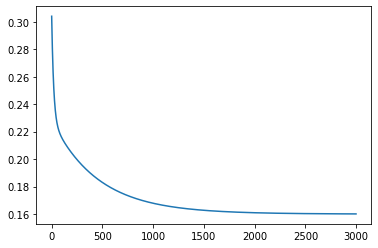

In [40]:
# Importing random module
import random

m = np.random.randn(1,11)
c = random.random()

iterations = 3000
lr = 0.01
error_array = []

for i in range(0,iterations):
    m = m - lr*derivative_slopes(m,features,c,label)
    c = c - lr*derivative_intercept(m,features,c,label)
    error_array.append(error(m,features,c,label))
    clear_output = True
    print("Current Error: ",error(m,features,c,label),"Current Iteration:",i)
    print("Current Accuracy:",accuracy_pred(error(m,features,c,label),label))

print("Our Prediciton Accuracy: ",accuracy_pred(error(m,features,c,label),label)," %") 
plt.plot(error_array)
plt.show()